In [11]:
import subprocess 
from subprocess import PIPE
import rasterio
import json
import glob 
import pandas as pd
import os
import numpy as np
import cv2

In [4]:
# The local folder path where the labels are stored
path_labels = '/Volumes/ADATA_HV620/SEN12-FLOOD/Sentinel_2/sen12floods_s2_labels'

In [5]:
# The local folder where the training images are stored
path_training_images = '/Volumes/ADATA_HV620/SEN12-FLOOD/Sentinel_2/Images/sen12floods_s2_source'

In [15]:
path_testing_images = '/Volumes/ADATA_HV620/SEN12-FLOOD/Sentinel_2/Images/test_images'

In [7]:
# This functions accepts as argument the name of the image and it searches for the coresponding label. 
# If the image depicts a flooded area then it returns the number one (1) otherwise it returns the number zero (0)

def image_label(product_id):
    
    rootdir = "/Volumes/ADATA_HV620/SEN12-FLOOD/Sentinel_2/sen12floods_s2_labels/sen12floods_s2_labels_"
    pd = product_id.split("_")
    pd = pd[3] + "_" + pd[4] + "_" + pd[5] + "_" + pd[6]
    
    json_data=open(rootdir + pd +"/stac.json", "rb")
    jdata = json.load(json_data)
    flood = jdata["properties"]["FLOODING"]
    

    if (flood == "False"):
        image_label = 0
    else:
        image_label = 1
    
    return image_label


In [8]:
# This function it accepts as argument the path of the folder where the image is stored.
# Inside this folder there is a json file containing the product id as a property
# It return the product id

def product_name(path):
    
    json_data=open(path+"/stac.json", "rb")
    jdata = json.load(json_data)
    
    return  jdata['id']

In [ ]:
/Volumes/ADATA_HV620/SEN12-FLOOD/Sentinel_2/sen12floods_s2_labels/sen12floods_s2_labels_0_2019_01_26

In [29]:
# This function is responsible for constructing the dataset in a way compatible with keras.
# It iterates through folders and searches for images along with their coresponding label.

def load_data():
    
    data = [] 
    images = []
    labels = []
    
    for folder in imagelist:
        try:
            product_id = product_name(folder)
            print(f"Processing {product_id} image product")
            label = image_label(product_id)
        
            # Open the img
            image = cv2.imread(folder + "/stack.tif")
            # Append the image and its corresponding label to the output
            images.append(image)
            labels.append(label)
        except:
            pass
        
        
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')
        
        
    data.append([images, labels])     

    return images, labels

## Load the Training Dataset

In [28]:
# Create a list with all the folders containing spectral bands


imagelist = []
rootdir = '/Volumes/ADATA_HV620/SEN12-FLOOD/Sentinel_2/Images/sen12floods_s2_source'
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        imagelist.append(d)
        
        
print(f"The number of training samples is currently = {len(imagelist)}")

The number of training samples is currently = 1891


In [30]:
train_images, train_labels = load_data()

Processing sen12floods_s2_source_0001_2018_12_18 image product
Processing sen12floods_s2_source_0001_2018_12_23 image product
Processing sen12floods_s2_source_0001_2019_01_02 image product
Processing sen12floods_s2_source_0001_2019_01_12 image product
Processing sen12floods_s2_source_0001_2019_01_17 image product
Processing sen12floods_s2_source_0001_2019_01_22 image product
Processing sen12floods_s2_source_0001_2019_02_01 image product
Processing sen12floods_s2_source_0001_2019_02_06 image product
Processing sen12floods_s2_source_0004_2018_12_17 image product
Processing sen12floods_s2_source_0004_2018_12_22 image product
Processing sen12floods_s2_source_0004_2019_01_16 image product
Processing sen12floods_s2_source_0005_2018_12_17 image product
Processing sen12floods_s2_source_0005_2018_12_22 image product
Processing sen12floods_s2_source_0005_2019_01_06 image product
Processing sen12floods_s2_source_0005_2019_01_16 image product
Processing sen12floods_s2_source_0006_2018_12_17 image 

Processing sen12floods_s2_source_0030_2018_12_28 image product
Processing sen12floods_s2_source_0030_2019_02_01 image product
Processing sen12floods_s2_source_0031_2018_12_28 image product
Processing sen12floods_s2_source_0031_2019_02_01 image product
Processing sen12floods_s2_source_0033_2018_12_28 image product
Processing sen12floods_s2_source_0033_2019_02_01 image product
Processing sen12floods_s2_source_0034_2018_12_28 image product
Processing sen12floods_s2_source_0034_2019_02_01 image product
Processing sen12floods_s2_source_0035_2018_12_28 image product
Processing sen12floods_s2_source_0035_2019_02_01 image product
Processing sen12floods_s2_source_0036_2018_12_28 image product
Processing sen12floods_s2_source_0036_2019_02_01 image product
Processing sen12floods_s2_source_0037_2018_12_28 image product
Processing sen12floods_s2_source_0037_2019_02_01 image product
Processing sen12floods_s2_source_0042_2018_12_28 image product
Processing sen12floods_s2_source_0042_2019_02_01 image 

Processing sen12floods_s2_source_0088_2018_12_26 image product
Processing sen12floods_s2_source_0088_2018_12_31 image product
Processing sen12floods_s2_source_0088_2019_01_05 image product
Processing sen12floods_s2_source_0088_2019_01_10 image product
Processing sen12floods_s2_source_0088_2019_01_30 image product
Processing sen12floods_s2_source_0088_2019_02_04 image product
Processing sen12floods_s2_source_0088_2019_02_14 image product
Processing sen12floods_s2_source_0089_2018_12_26 image product
Processing sen12floods_s2_source_0089_2018_12_31 image product
Processing sen12floods_s2_source_0089_2019_01_05 image product
Processing sen12floods_s2_source_0089_2019_01_10 image product
Processing sen12floods_s2_source_0089_2019_01_30 image product
Processing sen12floods_s2_source_0089_2019_02_04 image product
Processing sen12floods_s2_source_0089_2019_02_14 image product
Processing sen12floods_s2_source_0090_2018_12_13 image product
Processing sen12floods_s2_source_0090_2018_12_28 image 

Processing sen12floods_s2_source_0108_2019_01_02 image product
Processing sen12floods_s2_source_0108_2019_01_22 image product
Processing sen12floods_s2_source_0108_2019_01_27 image product
Processing sen12floods_s2_source_0108_2019_02_06 image product
Processing sen12floods_s2_source_0108_2019_02_11 image product
Processing sen12floods_s2_source_0109_2018_12_13 image product
Processing sen12floods_s2_source_0109_2018_12_28 image product
Processing sen12floods_s2_source_0109_2019_01_02 image product
Processing sen12floods_s2_source_0109_2019_01_22 image product
Processing sen12floods_s2_source_0109_2019_01_27 image product
Processing sen12floods_s2_source_0109_2019_02_06 image product
Processing sen12floods_s2_source_0109_2019_02_11 image product
Processing sen12floods_s2_source_0111_2018_12_13 image product
Processing sen12floods_s2_source_0111_2018_12_28 image product
Processing sen12floods_s2_source_0111_2019_01_02 image product
Processing sen12floods_s2_source_0111_2019_01_22 image 

Processing sen12floods_s2_source_0137_2019_04_09 image product
Processing sen12floods_s2_source_0138_2019_02_23 image product
Processing sen12floods_s2_source_0138_2019_02_28 image product
Processing sen12floods_s2_source_0138_2019_03_10 image product
Processing sen12floods_s2_source_0138_2019_03_25 image product
Processing sen12floods_s2_source_0138_2019_03_30 image product
Processing sen12floods_s2_source_0138_2019_04_09 image product
Processing sen12floods_s2_source_0139_2019_02_23 image product
Processing sen12floods_s2_source_0139_2019_02_28 image product
Processing sen12floods_s2_source_0139_2019_03_10 image product
Processing sen12floods_s2_source_0139_2019_03_25 image product
Processing sen12floods_s2_source_0139_2019_03_30 image product
Processing sen12floods_s2_source_0139_2019_04_09 image product
Processing sen12floods_s2_source_0140_2019_01_31 image product
Processing sen12floods_s2_source_0140_2019_02_10 image product
Processing sen12floods_s2_source_0140_2019_02_25 image 

Processing sen12floods_s2_source_0160_2019_04_01 image product
Processing sen12floods_s2_source_0160_2019_04_16 image product
Processing sen12floods_s2_source_0161_2019_01_31 image product
Processing sen12floods_s2_source_0161_2019_02_10 image product
Processing sen12floods_s2_source_0161_2019_02_25 image product
Processing sen12floods_s2_source_0161_2019_04_01 image product
Processing sen12floods_s2_source_0161_2019_04_16 image product
Processing sen12floods_s2_source_0162_2019_01_31 image product
Processing sen12floods_s2_source_0162_2019_02_10 image product
Processing sen12floods_s2_source_0162_2019_02_25 image product
Processing sen12floods_s2_source_0162_2019_04_01 image product
Processing sen12floods_s2_source_0162_2019_04_16 image product
Processing sen12floods_s2_source_0163_2019_01_31 image product
Processing sen12floods_s2_source_0163_2019_02_10 image product
Processing sen12floods_s2_source_0163_2019_02_25 image product
Processing sen12floods_s2_source_0163_2019_04_01 image 

Processing sen12floods_s2_source_0193_2019_02_23 image product
Processing sen12floods_s2_source_0193_2019_02_28 image product
Processing sen12floods_s2_source_0193_2019_03_10 image product
Processing sen12floods_s2_source_0193_2019_03_25 image product
Processing sen12floods_s2_source_0193_2019_04_04 image product
Processing sen12floods_s2_source_0193_2019_04_14 image product
Processing sen12floods_s2_source_0193_2019_04_24 image product
Processing sen12floods_s2_source_0194_2019_02_23 image product
Processing sen12floods_s2_source_0194_2019_02_28 image product
Processing sen12floods_s2_source_0194_2019_03_10 image product
Processing sen12floods_s2_source_0194_2019_03_25 image product
Processing sen12floods_s2_source_0194_2019_04_04 image product
Processing sen12floods_s2_source_0194_2019_04_14 image product
Processing sen12floods_s2_source_0194_2019_04_24 image product
Processing sen12floods_s2_source_0196_2019_02_13 image product
Processing sen12floods_s2_source_0196_2019_02_23 image 

Processing sen12floods_s2_source_0216_2019_04_04 image product
Processing sen12floods_s2_source_0216_2019_04_19 image product
Processing sen12floods_s2_source_0216_2019_04_24 image product
Processing sen12floods_s2_source_0217_2019_02_13 image product
Processing sen12floods_s2_source_0217_2019_02_23 image product
Processing sen12floods_s2_source_0217_2019_02_28 image product
Processing sen12floods_s2_source_0217_2019_03_25 image product
Processing sen12floods_s2_source_0217_2019_04_04 image product
Processing sen12floods_s2_source_0217_2019_04_19 image product
Processing sen12floods_s2_source_0217_2019_04_24 image product
Processing sen12floods_s2_source_0218_2019_02_13 image product
Processing sen12floods_s2_source_0218_2019_02_23 image product
Processing sen12floods_s2_source_0218_2019_02_28 image product
Processing sen12floods_s2_source_0218_2019_03_25 image product
Processing sen12floods_s2_source_0218_2019_04_04 image product
Processing sen12floods_s2_source_0218_2019_04_19 image 

Processing sen12floods_s2_source_0236_2019_03_27 image product
Processing sen12floods_s2_source_0236_2019_04_08 image product
Processing sen12floods_s2_source_0236_2019_04_21 image product
Processing sen12floods_s2_source_0236_2019_04_23 image product
Processing sen12floods_s2_source_0238_2019_03_09 image product
Processing sen12floods_s2_source_0238_2019_03_12 image product
Processing sen12floods_s2_source_0238_2019_03_17 image product
Processing sen12floods_s2_source_0238_2019_03_19 image product
Processing sen12floods_s2_source_0238_2019_03_22 image product
Processing sen12floods_s2_source_0238_2019_03_27 image product
Processing sen12floods_s2_source_0238_2019_04_08 image product
Processing sen12floods_s2_source_0238_2019_04_21 image product
Processing sen12floods_s2_source_0238_2019_04_23 image product
Processing sen12floods_s2_source_0240_2019_03_09 image product
Processing sen12floods_s2_source_0240_2019_03_12 image product
Processing sen12floods_s2_source_0240_2019_03_27 image 

Processing sen12floods_s2_source_0257_2019_03_07 image product
Processing sen12floods_s2_source_0257_2019_03_09 image product
Processing sen12floods_s2_source_0257_2019_03_12 image product
Processing sen12floods_s2_source_0257_2019_03_19 image product
Processing sen12floods_s2_source_0257_2019_03_22 image product
Processing sen12floods_s2_source_0258_2019_02_25 image product
Processing sen12floods_s2_source_0258_2019_03_02 image product
Processing sen12floods_s2_source_0258_2019_03_04 image product
Processing sen12floods_s2_source_0258_2019_03_07 image product
Processing sen12floods_s2_source_0258_2019_03_09 image product
Processing sen12floods_s2_source_0258_2019_03_12 image product
Processing sen12floods_s2_source_0258_2019_03_19 image product
Processing sen12floods_s2_source_0258_2019_03_22 image product
Processing sen12floods_s2_source_0259_2019_02_25 image product
Processing sen12floods_s2_source_0259_2019_03_02 image product
Processing sen12floods_s2_source_0259_2019_03_04 image 

Processing sen12floods_s2_source_0277_2019_03_07 image product
Processing sen12floods_s2_source_0277_2019_03_09 image product
Processing sen12floods_s2_source_0277_2019_03_12 image product
Processing sen12floods_s2_source_0277_2019_03_17 image product
Processing sen12floods_s2_source_0277_2019_03_19 image product
Processing sen12floods_s2_source_0277_2019_03_22 image product
Processing sen12floods_s2_source_0278_2019_02_25 image product
Processing sen12floods_s2_source_0278_2019_03_04 image product
Processing sen12floods_s2_source_0278_2019_03_07 image product
Processing sen12floods_s2_source_0278_2019_03_09 image product
Processing sen12floods_s2_source_0278_2019_03_12 image product
Processing sen12floods_s2_source_0278_2019_03_17 image product
Processing sen12floods_s2_source_0278_2019_03_19 image product
Processing sen12floods_s2_source_0278_2019_03_22 image product
Processing sen12floods_s2_source_0279_2019_02_25 image product
Processing sen12floods_s2_source_0279_2019_03_02 image 

Processing sen12floods_s2_source_0308_2019_01_09 image product
Processing sen12floods_s2_source_0308_2019_02_13 image product
Processing sen12floods_s2_source_0308_2019_02_28 image product
Processing sen12floods_s2_source_0308_2019_03_15 image product
Processing sen12floods_s2_source_0309_2019_01_09 image product
Processing sen12floods_s2_source_0309_2019_02_13 image product
Processing sen12floods_s2_source_0309_2019_02_28 image product
Processing sen12floods_s2_source_0309_2019_03_15 image product
Processing sen12floods_s2_source_0310_2019_01_09 image product
Processing sen12floods_s2_source_0310_2019_02_13 image product
Processing sen12floods_s2_source_0310_2019_02_28 image product
Processing sen12floods_s2_source_0310_2019_03_15 image product
Processing sen12floods_s2_source_0311_2019_01_09 image product
Processing sen12floods_s2_source_0311_2019_02_13 image product
Processing sen12floods_s2_source_0311_2019_02_28 image product
Processing sen12floods_s2_source_0311_2019_03_15 image 

Processing sen12floods_s2_source_27_2019_03_17 image product
Processing sen12floods_s2_source_27_2019_03_19 image product
Processing sen12floods_s2_source_27_2019_03_22 image product
Processing sen12floods_s2_source_27_2019_03_27 image product
Processing sen12floods_s2_source_27_2019_04_08 image product
Processing sen12floods_s2_source_27_2019_04_21 image product
Processing sen12floods_s2_source_27_2019_04_23 image product
Processing sen12floods_s2_source_28_2018_12_13 image product
Processing sen12floods_s2_source_28_2018_12_28 image product
Processing sen12floods_s2_source_28_2019_01_02 image product
Processing sen12floods_s2_source_28_2019_01_27 image product
Processing sen12floods_s2_source_28_2019_02_06 image product
Processing sen12floods_s2_source_28_2019_02_11 image product
Processing sen12floods_s2_source_29_2018_12_26 image product
Processing sen12floods_s2_source_29_2018_12_31 image product
Processing sen12floods_s2_source_29_2019_01_05 image product
Processing sen12floods_s

Processing sen12floods_s2_source_45_2019_01_24 image product
Processing sen12floods_s2_source_45_2019_01_29 image product
Processing sen12floods_s2_source_45_2019_02_03 image product
Processing sen12floods_s2_source_46_2019_01_09 image product
Processing sen12floods_s2_source_46_2019_02_13 image product
Processing sen12floods_s2_source_46_2019_02_28 image product
Processing sen12floods_s2_source_46_2019_03_15 image product
Processing sen12floods_s2_source_47_2019_02_25 image product
Processing sen12floods_s2_source_47_2019_03_02 image product
Processing sen12floods_s2_source_47_2019_03_04 image product
Processing sen12floods_s2_source_47_2019_03_07 image product
Processing sen12floods_s2_source_47_2019_03_09 image product
Processing sen12floods_s2_source_47_2019_03_12 image product
Processing sen12floods_s2_source_47_2019_03_17 image product
Processing sen12floods_s2_source_47_2019_03_19 image product
Processing sen12floods_s2_source_47_2019_03_22 image product
Processing sen12floods_s

Processing sen12floods_s2_source_67_2019_02_10 image product
Processing sen12floods_s2_source_67_2019_02_25 image product
Processing sen12floods_s2_source_67_2019_03_12 image product
Processing sen12floods_s2_source_67_2019_04_01 image product
Processing sen12floods_s2_source_67_2019_04_06 image product
Processing sen12floods_s2_source_67_2019_04_16 image product
Processing sen12floods_s2_source_67_2019_04_21 image product
Processing sen12floods_s2_source_6_2019_01_09 image product
Processing sen12floods_s2_source_6_2019_02_13 image product
Processing sen12floods_s2_source_6_2019_02_28 image product
Processing sen12floods_s2_source_6_2019_03_15 image product
Processing sen12floods_s2_source_7_2018_12_28 image product
Processing sen12floods_s2_source_7_2019_01_07 image product
Processing sen12floods_s2_source_7_2019_01_12 image product
Processing sen12floods_s2_source_7_2019_01_17 image product
Processing sen12floods_s2_source_7_2019_01_22 image product
Processing sen12floods_s2_source_

## Test Dataset

In [31]:
# Create a list with all the folders containing spectral bands


imagelist = []
rootdir = path_testing_images # define the path for the folder
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        imagelist.append(d)
        
        
print(f"The number of testing samples is = {len(imagelist)}")

The number of testing samples is = 56


In [17]:
imagelist[0]

'/Volumes/ADATA_HV620/SEN12-FLOOD/Sentinel_2/Images/test_images/sen12floods_s2_source_0331_2019_01_09'

In [32]:
test_images, test_labels = load_data()

Processing sen12floods_s2_source_0323_2019_01_09 image product
Processing sen12floods_s2_source_0323_2019_02_13 image product
Processing sen12floods_s2_source_0323_2019_02_28 image product
Processing sen12floods_s2_source_0323_2019_03_15 image product
Processing sen12floods_s2_source_0324_2019_01_09 image product
Processing sen12floods_s2_source_0324_2019_02_13 image product
Processing sen12floods_s2_source_0324_2019_02_28 image product
Processing sen12floods_s2_source_0324_2019_03_15 image product
Processing sen12floods_s2_source_0325_2019_01_09 image product
Processing sen12floods_s2_source_0325_2019_02_13 image product
Processing sen12floods_s2_source_0325_2019_02_28 image product
Processing sen12floods_s2_source_0325_2019_03_15 image product
Processing sen12floods_s2_source_0326_2019_01_09 image product
Processing sen12floods_s2_source_0326_2019_02_13 image product
Processing sen12floods_s2_source_0326_2019_02_28 image product
Processing sen12floods_s2_source_0326_2019_03_15 image 

## Explore the Dataset

In [20]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [13]:
train_counts = np.unique(train_labels, return_counts=True)

In [39]:
print(train_labels.shape[])

IndexError: tuple index out of range

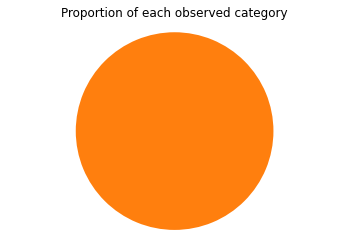

In [41]:
plt.pie(train_counts[0], explode=(0, 0))
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

## Model Creation

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (512, 512, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

## Compile the Model

In [42]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

## Fit the model on the available training data

In [43]:
history = model.fit(train_images, train_labels, batch_size=28, epochs=2, validation_split = 0.2)

Train on 1512 samples, validate on 379 samples
Epoch 1/2
1512/1512 [==============================] - 447s 296ms/sample - loss: 20.8793 - acc: 0.7136 - val_loss: 0.5956 - val_acc: 0.7889
Epoch 2/2
1512/1512 [==============================] - 368s 244ms/sample - loss: 0.3436 - acc: 0.8770 - val_loss: 0.6047 - val_acc: 0.7889


## Evaluating the result

In [44]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

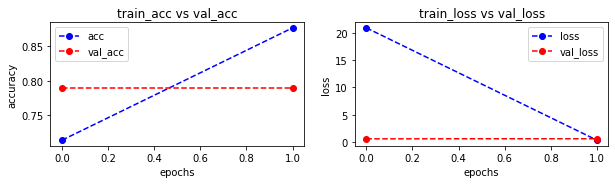

In [45]:
plot_accuracy_loss(history)

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 510, 510, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 253, 253, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 508032)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65028224  
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [47]:
test_loss = model.evaluate(test_images, test_labels)

56/56 [==============================] - 5s 90ms/sample - loss: 2.1584 - acc: 0.2500


## Feature extraction with VGG ImageNet

In [48]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

### Get the features directly from VGG16

In [49]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

KeyboardInterrupt: 

## Training on top of VGG

Let's train a simple one-layer Neural Network on the features extracted from VGG.

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_loss = model2.evaluate(test_features, test_labels)